mean = -1.0286291926748328
mean = -0.5074721014446656
mean = -1.5507818273491125e-07
mean = 0.49209010752997917
mean = 0.9677022757823258


<ipython-input-45-f3a6863b0bdb>:24: UserWarning: Attempting to set identical bottom == top == 0.49209010752997917 results in singular transformations; automatically expanding.
  ax2.set_ylim((np.min(energy2), np.max(energy2)))


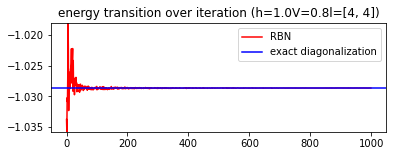

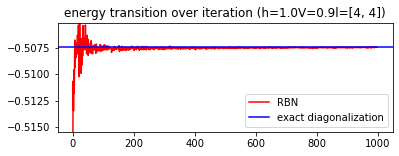

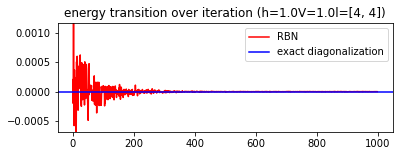

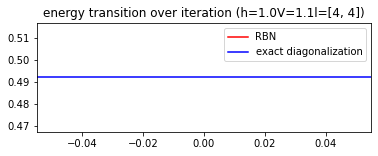

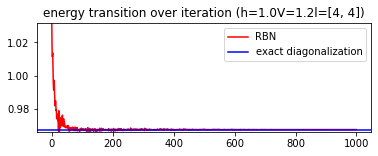

In [45]:
# Load the data from the .log file

import numpy as np
import json

# filename1 = 'h=1.0V=1.0l=[4, 4].log'

exact_energy = [-1.028629, -0.507427, 0, 0.492100, 0.967703]
vs = [0.8, 0.9, 1.0, 1.1, 1.2]
for v, e in zip(vs, exact_energy):
    filename2 = f'h=1.0V={v}l=[4, 4].log'
    data2=json.load(open("../log/"+filename2))["Output"]
    
    energy2 = []
    for i, d_ in enumerate(data2):
        energy2.append(d_['Energy']["Mean"])

    iters = np.arange(0, len(energy2))
    
    fig, ax2 = plt.subplots(1,figsize=(6, 2))
    ax2.set_title(f"energy transition over iteration (h=1.0V={v}l=[4, 4])")
    ax2.plot(iters, energy2, color='red', label='RBN')
    ax2.axhline(y=e, color='b',label="exact diagonalization")
    ax2.set_ylim((np.min(energy2), np.max(energy2)))
    ax2.legend()
    plt.savefig(f"image_V={v}.png")
    
    print(f'mean = {np.mean(energy2[-200:])}')


In [1]:
import sys
import importlib
importlib.reload(sys)
sys.path.insert(0,'../')
import numpy as np
import netket as nk
from scripts import functions as f
from scripts import new_dynamics, new_dynamics2
import os
currentpath = os.getcwd()
parentdir = os.path.dirname(currentpath)
from conf import *

length = [4,4]
hex_ = nk.machine.new_hex(np.array(length))
t_list = np.arange(0,20,0.1)


In [2]:
dimer = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=1.0l=[4, 4]/dimer_real_mean_5.0e+05.npy")
dimer_momentum = np.load("/home/keisuke/Documents/dimermaster/save/corr/h=1.0V=1.0l=[4, 4]/dimer_momentum_mean_5.0e+05.npy")

In [32]:
dimer_momentum_ = np.zeros((3,3,2 * length[0], 2*length[1],len(t_list)),dtype=np.complex128)
for a in range(3):
    for b in range(3):
        dimer_momentum_[a,b] = f.dimer_fourier2D(dimer[a,b])

In [3]:
A = np.array([
hex_.a1,
hex_.a2
])
[b1, b2] = np.linalg.inv(A.T)

In [4]:
x = np.arange(length[0])
y = np.arange(length[1])

xx, yy = np.meshgrid(x,y)
xx = xx.reshape(-1)
yy = yy.reshape(-1)

np.coordinates = np.zeros((8, 8, 2))

for i in range(8):
    for j in range(8):
        np.coordinates[i,j] = b1 * i + b2 * j 

In [6]:
from matplotlib import pyplot as plt

from scipy.stats import linregress
def fit(x, y, w):
    
    L = x.shape[0]
    
    slope, intercept, r, p, se = linregress(x, y)
    
    return slope, intercept, r

In [7]:
import scipy
params, _ = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b*t),  t_list,  np.abs(dimer_momentum[index].real))

NameError: name 'index' is not defined

<ipython-input-10-b79ac2dac94e>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,figsize=(6, 3))


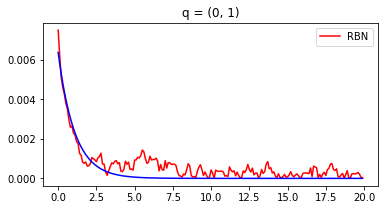

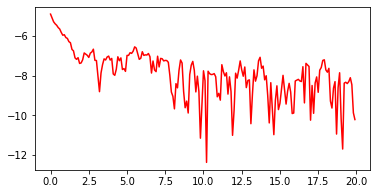

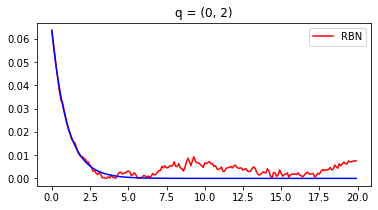

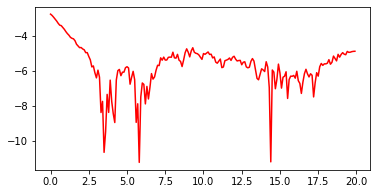

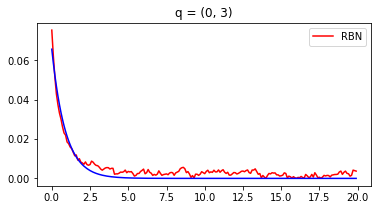

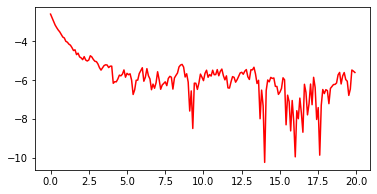

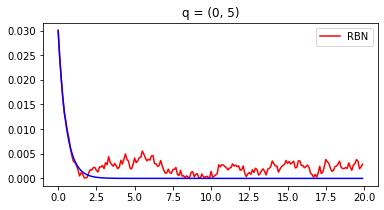

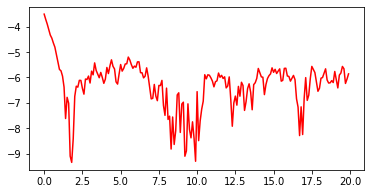

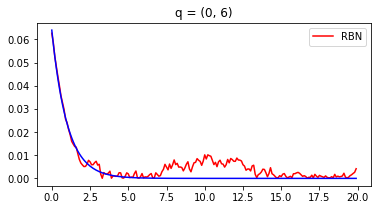

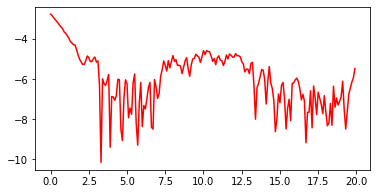

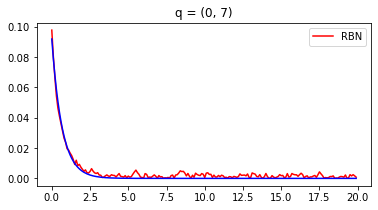

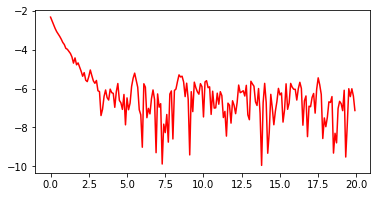

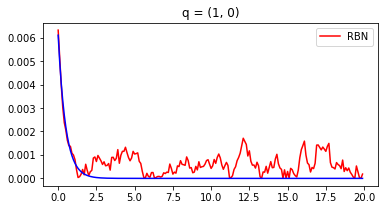

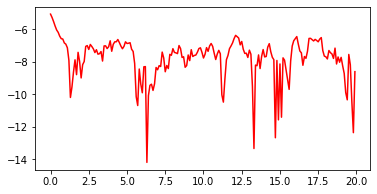

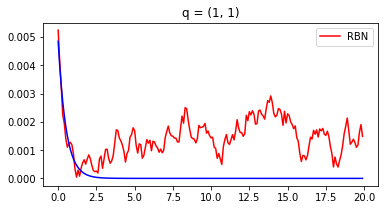

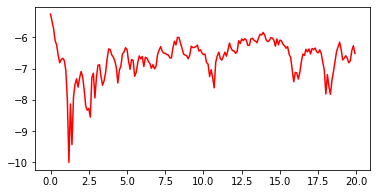

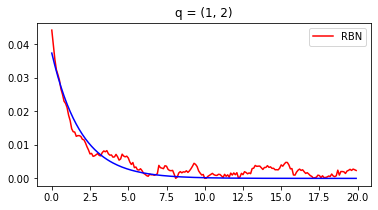

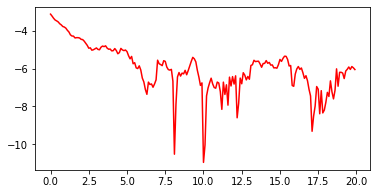

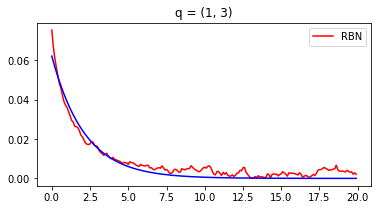

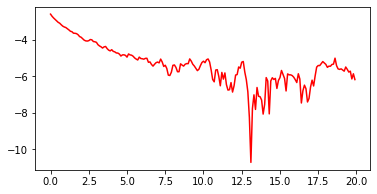

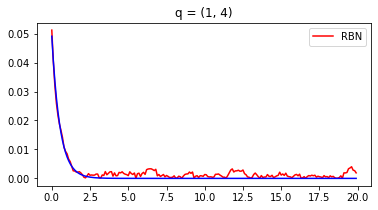

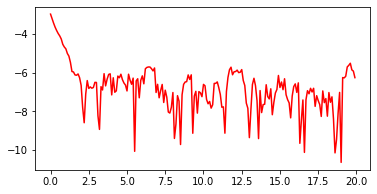

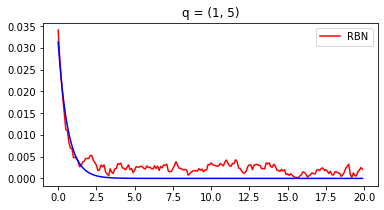

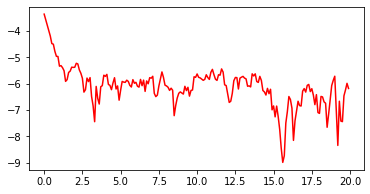

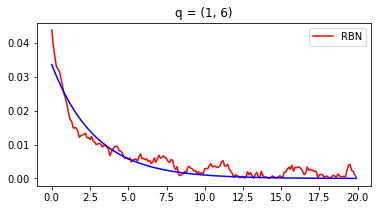

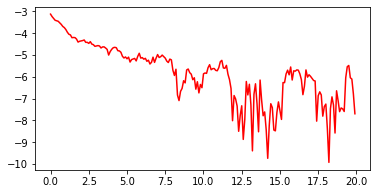

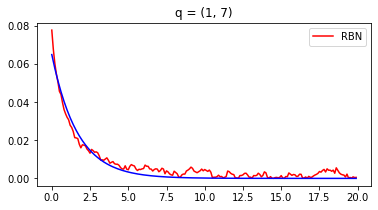

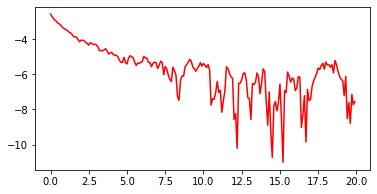

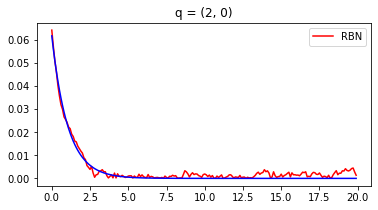

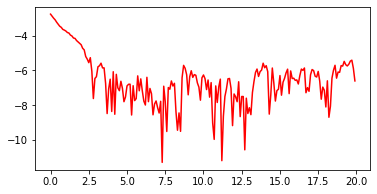

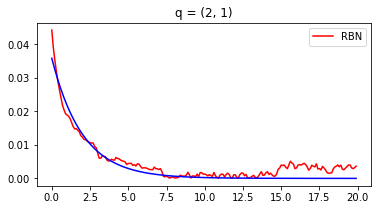

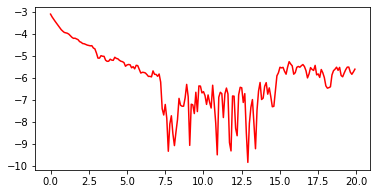

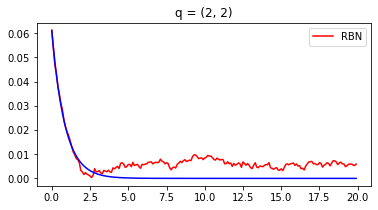

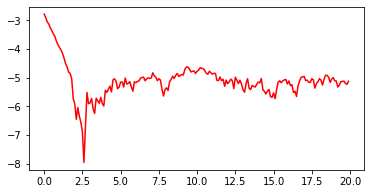

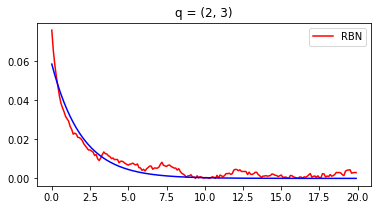

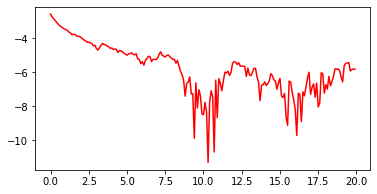

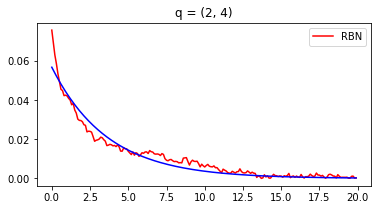

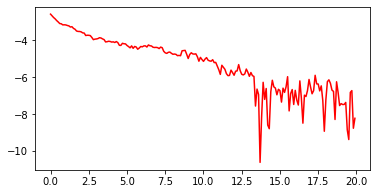

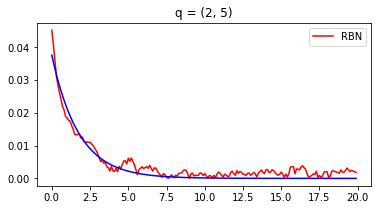

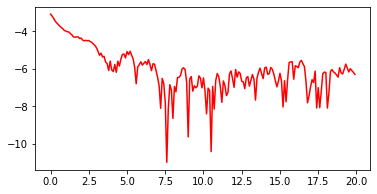

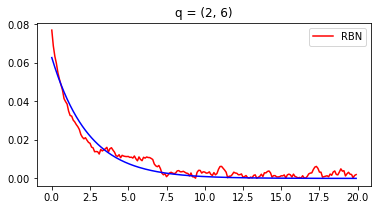

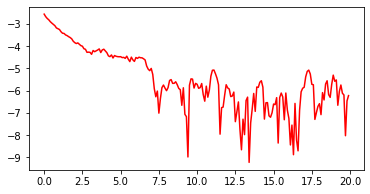

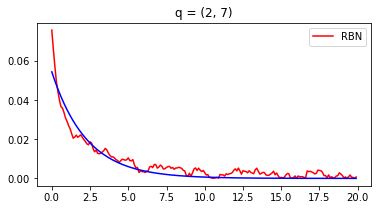

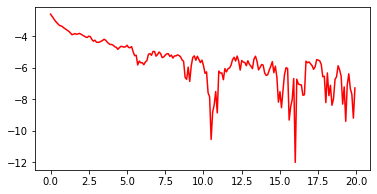

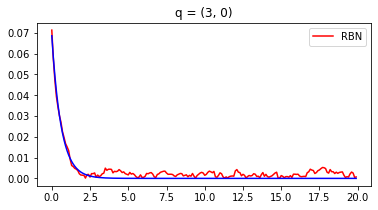

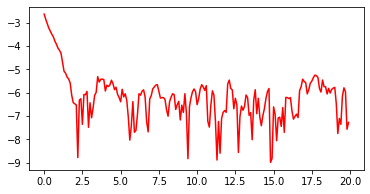

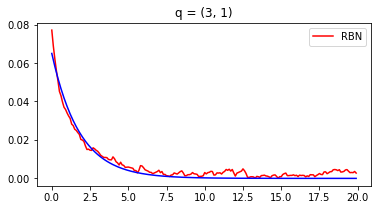

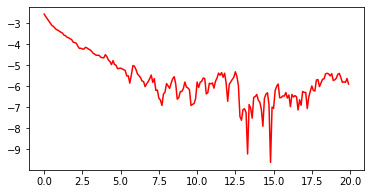

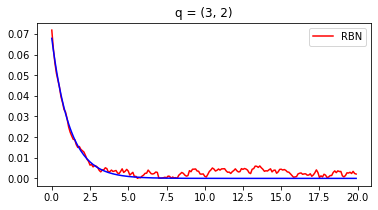

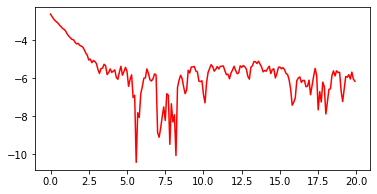

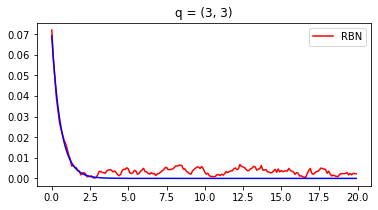

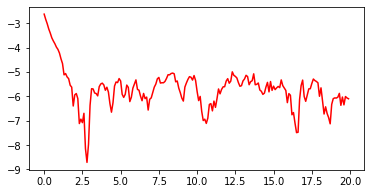

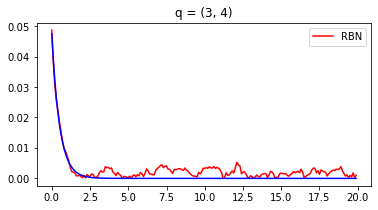

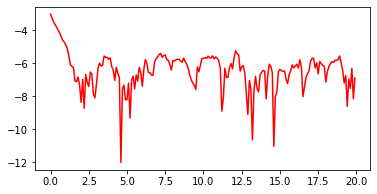

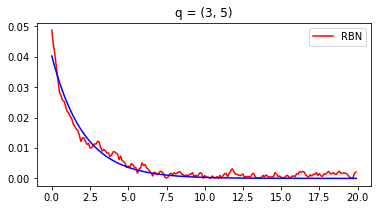

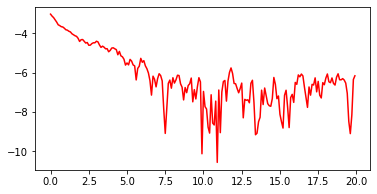

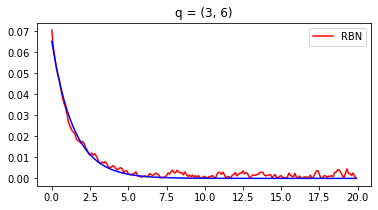

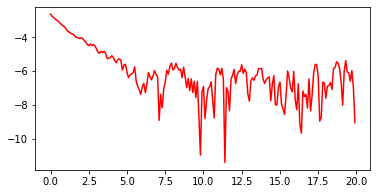

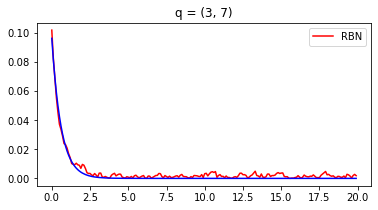

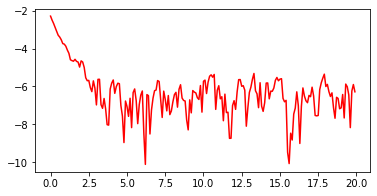

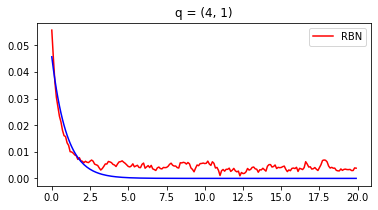

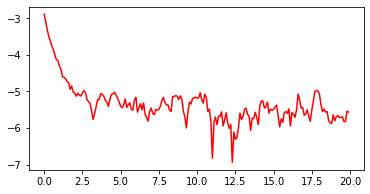

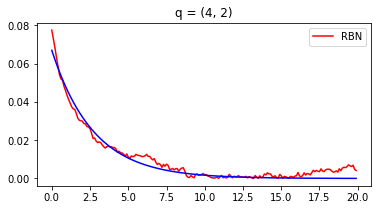

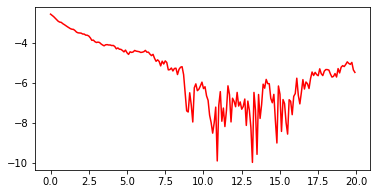

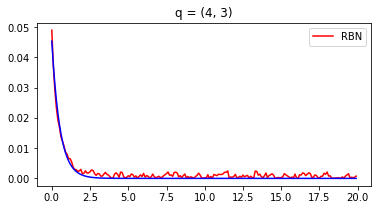

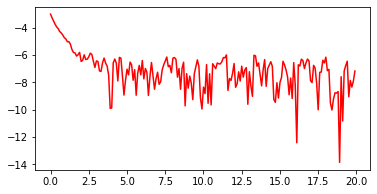

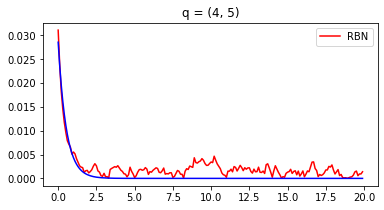

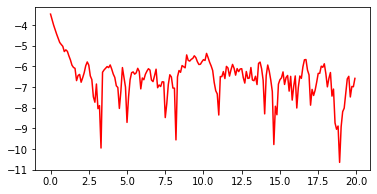

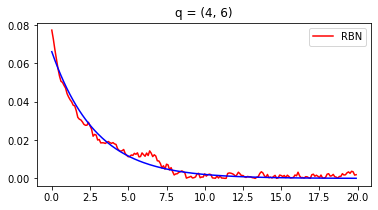

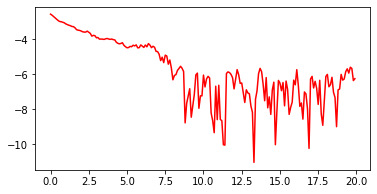

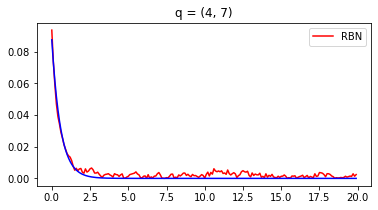

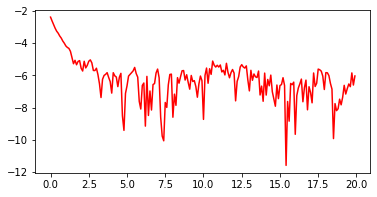

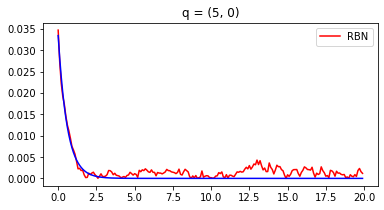

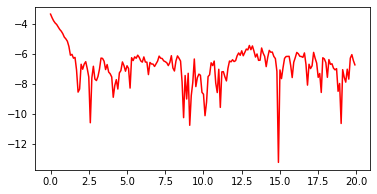

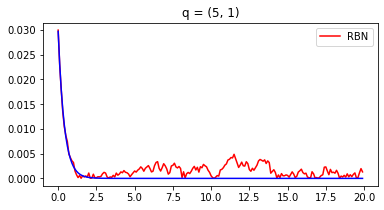

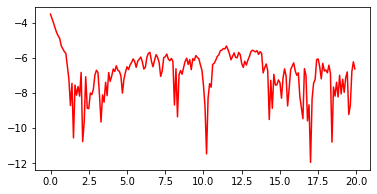

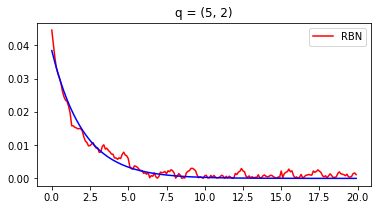

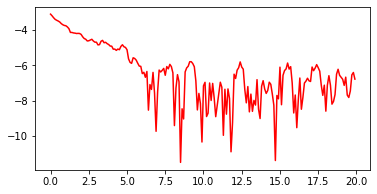

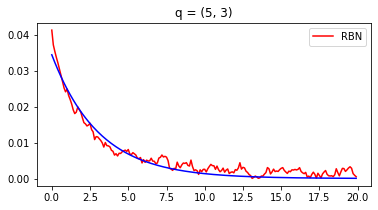

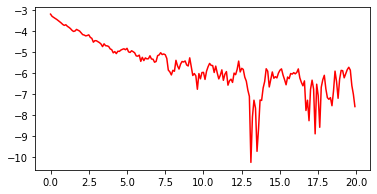

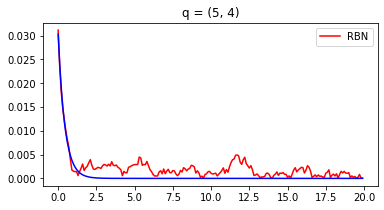

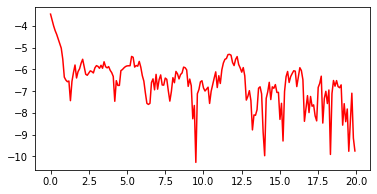

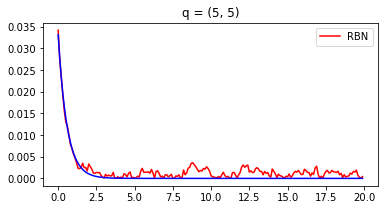

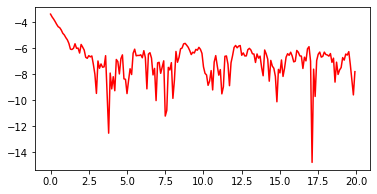

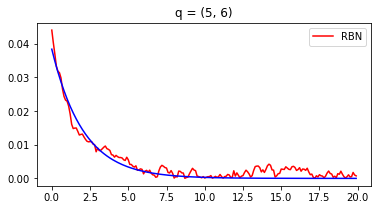

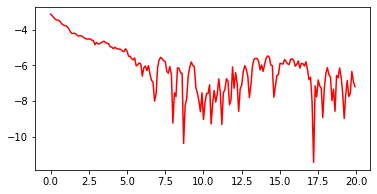

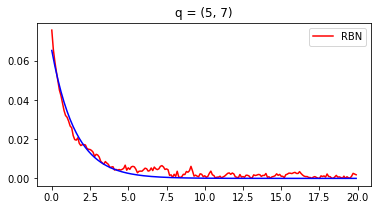

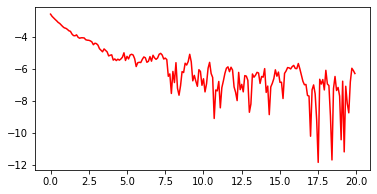

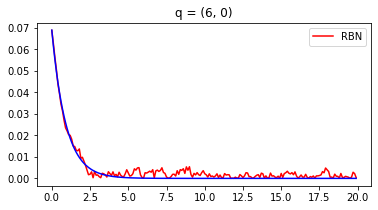

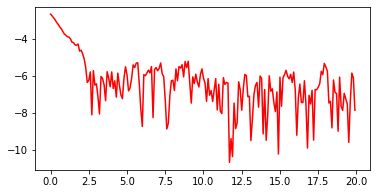

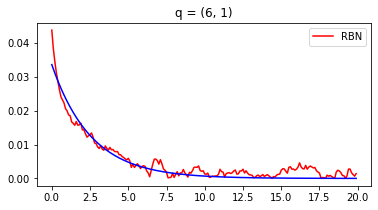

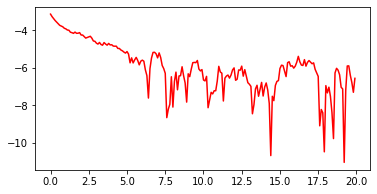

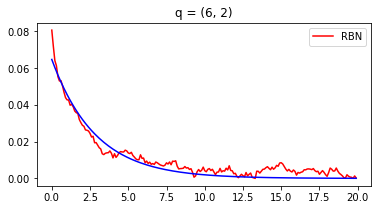

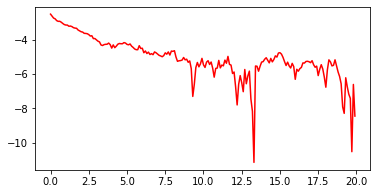

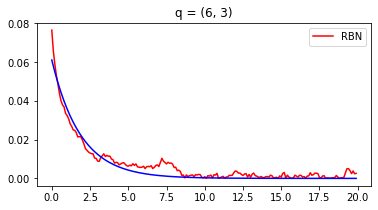

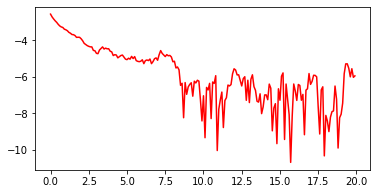

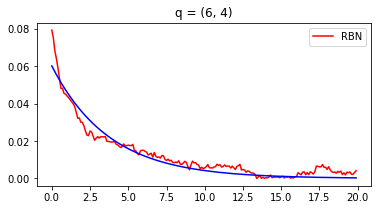

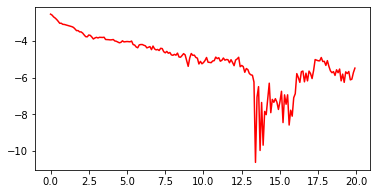

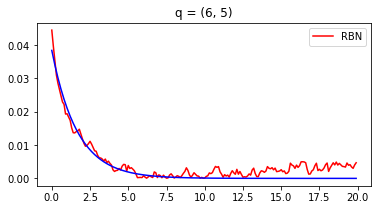

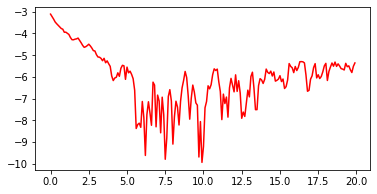

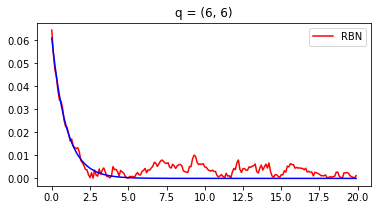

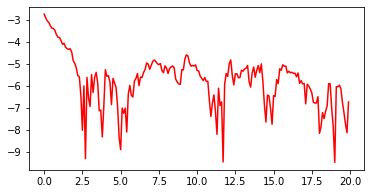

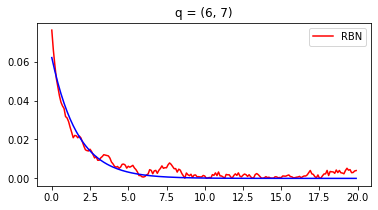

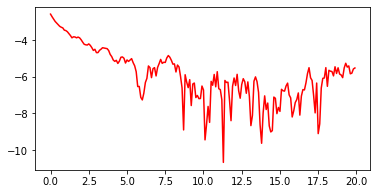

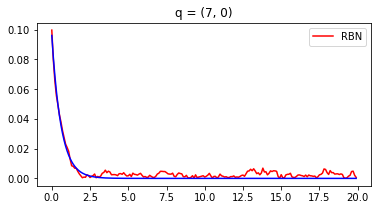

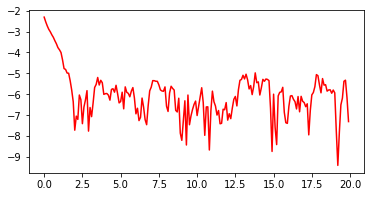

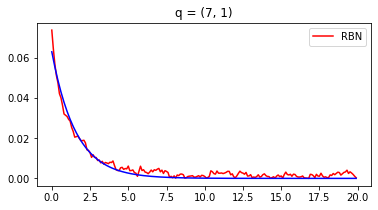

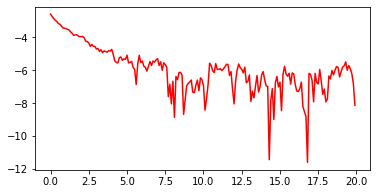

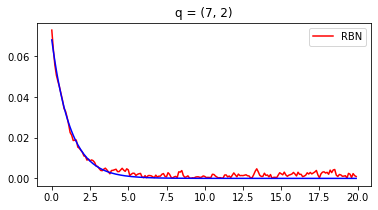

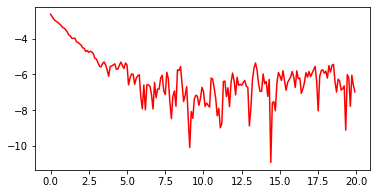

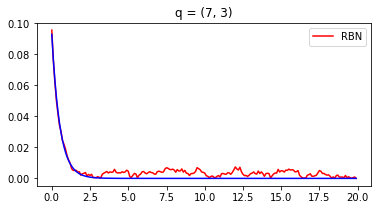

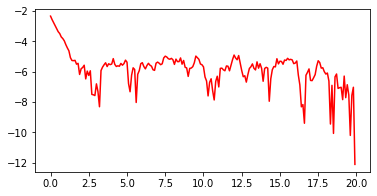

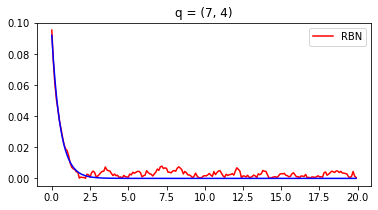

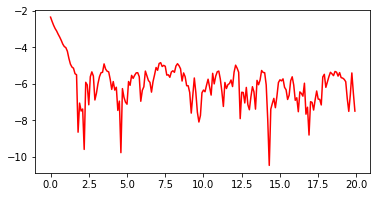

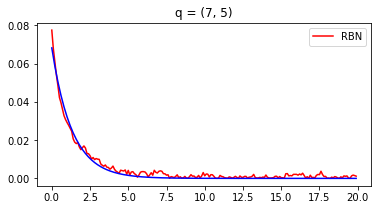

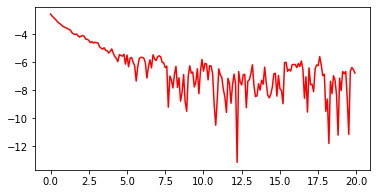

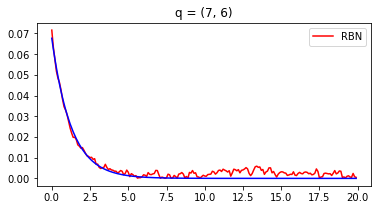

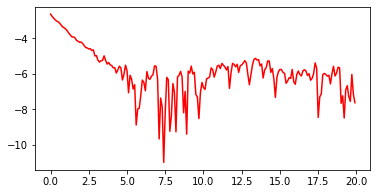

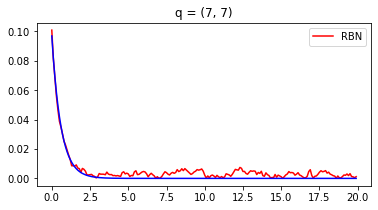

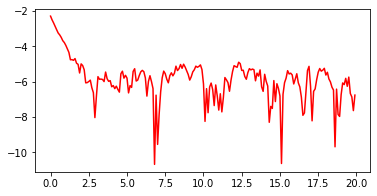

In [10]:
fitting_energy = []
index_list =[]
for i in range(8):
    for j in range(8):
        index = (i, j)
        if (i in [0,4]) and (j in [0,4]):
            continue
        index_list.append(index)
        fig, ax = plt.subplots(1,figsize=(6, 3))
        
        ax.plot(t_list, np.abs(dimer_momentum[index].real), color='red', label='RBN')
        ax.set_title(f"q = {index}")
        ax.legend()
        params, _ = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-b*t),  t_list,  np.abs(dimer_momentum[index].real))
        ax.plot(t_list, params[0] * np.exp(-params[1]*t_list), color='blue', label='fitted')

        fig2, ax2 = plt.subplots(1,figsize=(6, 3))

        ax2.plot(t_list, np.log(np.abs(dimer_momentum[index].real)), color='red', label='RBN')
        
        fitting_energy.append(params[1])
        


In [18]:

A = np.array([
hex_.a1,
hex_.a2
])

[b1, b2] = np.linalg.inv(A.T)

n = len(index_list)
corr = np.zeros((n,2))

s = 0
for (i,j) in index_list:
    corr[s] = b1 * i + b2 * j
    s+=1


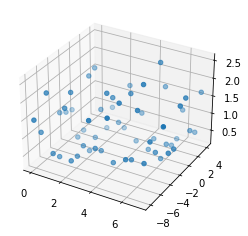

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=corr[:,0], ys=corr[:,1], zs=np.array(fitting_energy))

In [27]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
t = np.linspace(0, 10, 50)
x, y, z = corr[:,0], corr[:,1], np.array(fitting_energy)

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers')])
fig.show()

In [44]:
h = 1.0
V = 1.0
l = [4,4]

name = 'h={}V={}l={}'.format(h, V, length)
P_list  = []
for j in range(10):

    P_list.append(np.load(parentdir+f'/save/dynamics/{name}/P_n=1.0e+04_{j}.npy'))

In [45]:
P_list[0].shape

(200, 9996, 32)

In [46]:
P_list[0].shape

(200, 9996, 32)

In [47]:
P = np.vstack(P_list)

In [48]:
unique, counts = np.unique(P.reshape(-1, 32)[:10**4], return_counts=True ,axis = 0)

In [49]:
counts

array([17,  5,  6, ...,  6,  8,  9])

In [50]:
unique.shape

(1152, 32)

In [51]:
length = [4, 4]
hex_ = nk.machine.new_hex(np.array(length))

kernel = 1
# sweep_size = 200
decay_factor = 1  # or 'sigmoid decay'



g = nk.graph.Graph(nodes = [i for i in range(length[0] * length[1] * 2)])
hi = nk.hilbert.Spin(s=0.5, graph=g)



op, ad2o_o, op_num, label_num  = f.dimer_flip1(length = np.array(length), return_info = True)
op2= f.dimer_flip_old(length = np.array(length))

ad2_bool = np.zeros([ad2o_o.shape[0], ad2o_o.shape[0]], dtype = np.bool)
for l in range(ad2o_o.shape[0]):
    label = ad2o_o[l]
    for op_ in label:
        ad2_bool[l,op_] = True
        
ma = nk.machine.RbmDimer(hi, hex_, alpha = 2, symmetry = True
                    ,use_hidden_bias = False, use_visible_bias = False, dtype=float, reverse=True, half=True)
ma.init_random_parameters(seed=1234)

ma.hex.ad2o_o = ad2o_o.astype(np.int64)
ma.hex.ad2_bool = ad2_bool

ma._ws[:] = np.random.normal(0, 1e-3)
ma._set_bare_parameters(
    ma._a, ma._b, ma._w, ma._as, ma._bs, ma._ws, ma._autom, ma._z2
)

V = 1
h = 1

ham = f.dimer_hamiltonian(V = V, h = h ,length=np.array(length))


n_jobs = 12
sa_mul = nk.sampler.DimerMetropolisLocal_multi(machine=ma, op=op
    , length = length, n_chains=n_chains, sweep_size = 10**4, kernel = 1, n_jobs=n_jobs, transition = 2)


sweep_size = 1000
sa_mul.reset()
_ = sa_mul.generate_samples(1000)

2
yoyo
number of core : 12
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2
transtion2


In [57]:
P_2 = sa_mul.generate_samples(10**5)

In [52]:
unique, counts = np.unique(P_list[0].reshape(-1, 32)[:10**4], return_counts=True ,axis = 0)

In [53]:
choosen_index = np.random.choice(np.arange(1152), size = 10**6)

P_new = unique[choosen_index]

In [86]:
_, counts_prime = np.unique(choosen_index, return_counts=True)
unique, counts_prime_2 = np.unique(P_2, return_counts=True ,axis = 0)

In [82]:
counts_prime_2

array([115, 101,  92, ...,  90,  87,  91])

In [56]:
edge_corr1 = np.array([ 0.5     ,  0.      ])
edge_corr2 = np.array([ 0.25    , -0.433013])
edge_corr3 = np.array([ 0.75    , -0.433013])

g = nk.graph.Graph(nodes = [i for i in range(length[0] * length[1] * 2)])
hi = nk.hilbert.Spin(s=0.5, graph=g)
hex_ = nk.machine.new_hex(np.array(length))


x = np.arange(2*length[0])
y = np.arange(2*length[1])

xx, yy = np.meshgrid(x,y)
xx = xx.reshape(-1)
yy = yy.reshape(-1)

operators_list = []

# for base_edge in [edge_corr1, edge_corr2, edge_corr3]:
edge_coor_array = hex_.ProcessPeriodic(xx[:,None] * hex_.a1[None,:]/2 + yy[:,None]  * hex_.a2[None,:]/2 + edge_corr1)
edges = hex_.edge_coor_to_lattice(edge_coor_array)
colors = hex_.get_edge_color(edges)

operators_list = f.return_spin_corr(hi, edges, colors)

In [254]:
def cal_dimer_corr(operators , P_list, hex_, t_list):
    
    length = hex_.l
    
    finite_index = (P_list[:,:,0]!=0)
    num_samples = finite_index.sum(axis=1)
    P_list_ = P_list.reshape(-1,P_list.shape[-1])
    sections1 = np.arange(P_list.shape[1])
    sections2 = np.zeros(P_list_.shape[0])





    dimer_corr = np.zeros((2*length[0],2*length[1],2*length[0],2*length[1],t_list.shape[0]))
    dimer_std = np.zeros((2*length[0],2*length[1],2*length[0],2*length[1],t_list.shape[0]))
    
    for i1 in range(2*length[1]):
        for i2 in range(2*length[0]):
                op = operators[i1 + i2 * 2 * length[0]]
                if not op:
                    continue
                _, mels1 = op.get_conn_flattened(P_list_, sections2)
                mels1 = mels1.reshape(P_list.shape[0], P_list.shape[1]).real * finite_index
                sub1 = (mels1.sum(axis=-1)/num_samples).real
                
                for l2 in range(2*length[1]):
                    for l1 in range(2*length[0]):
                        operator = operators[l1 + l2 * 2 * length[0]]
                        if not operator:
                            continue
                        mels2 = operator.get_conn_flattened(P_list[0,:,:], sections1)[1].real
                        sub2 = mels2.mean()

                        dimer_corr[l1,l2,i1,i2] = (mels2 * mels1).sum(axis=1)/num_samples 
                        dimer_std[l1,l2,i1,i2] = np.sqrt(((mels2 * mels1)**2).sum(axis=-1)/num_samples - (((mels2 * mels1)).sum(axis=-1)/num_samples)**2)
    
    
    return dimer_corr, dimer_std, num_samples

(1, 1000000, 32)

0 0


ValueError: operands could not be broadcast together with shapes (1,1000000) (1,1000000,32) 

In [93]:
P_new.shape

(1000000, 1, 32)

In [98]:
n = 2
N = 10**6
mels1, mels1 = operators_list[0][0].get_conn_flattened(P_new[:N,0], np.arange(N))
mels2, mels2 = operators_list[0][n].get_conn_flattened(P_new[:N,0], np.arange(N))
np.mean(mels1 * mels2) 

(0.5830299999999999+0j)

In [89]:
np.std(mels1 * mels2)  / np.sqrt(10**5)

0.0027911709461004015

In [99]:
mels1, mels1 = operators_list[0][0].get_conn_flattened(P_2[:,0,:], np.arange(99996))
mels2, mels2 = operators_list[0][n].get_conn_flattened(P_2[:,0,:], np.arange(99996))
np.mean(mels1 * mels2) 


(0.594223768950758+0j)

In [108]:
from scripts.dynamics_4 import new_dynamics_one
t_list = np.arange(0,1,0.1)
op = f.dimer_hamiltonian(h, V,np.array(length))

d = new_dynamics_one(op, ma)
n_jobs = 8
P = d.multiprocess(P_new[:,0,:], t_list, n_jobs) 

yoyo


In [110]:
dimer_corr = np.zeros((3,3,length[0],length[0], 10), dtype = np.float64)

for a in range(1):
    for b in range(1):
        print(a,b)
        dimer_corr[b, a], dimer_std, num_samples = f.cal_dimer_corr(operators_list[a][0], operators_list[b], P, hex_, t_list)

0 0


In [117]:
dimer_corr[0,0][1,0]

array([0.333826, 0.334898, 0.336916, 0.340146, 0.342706, 0.345822,
       0.349366, 0.352174, 0.354852, 0.357856])

In [118]:
dimer_std[0,0] / np.sqrt(N)

array([0.        , 0.00037786, 0.00049713, 0.00057086, 0.00062291,
       0.00066158, 0.00069057, 0.00071386, 0.00073223, 0.00074772])